# Problems Jupyter Notebook

In [1]:
""" 
Standard Library Imports
"""
import math


"""
Third Party Imports
""" 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats



## Problem 1: Extending the Lady Tasting Tea

<p align="center">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTD4bu4pFuN6_5dkXH5gfJ95SB-g4xMekkrog&s" 
       alt="The Lady Tasting Tea Cartoon" width="400">
</p>

### Objective: 
_Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first._

_Simulate this experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment._

_In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design._

More information on the experiment can be found [Here](https://en.wikipedia.org/wiki/Lady_tasting_tea)

In [2]:
# Set up our variables.
# Total number of cups.
num_cups = 12
# Number of tea first.
num_tea = 8
# Number of milk first.
num_milk = 4

Using `math.comb(n, k)` to calculate combinations.
Interestingly, as we have by guessing the number of milk first cups correctly, we automatically know the number of tea first cups correctly as well. Therefore we only need to calculate one side of the combination. It would not make sense to select the number of tea first cups, however we will explore the alternative to see if it makes a difference.  
[Math documentation including how `math.comb` works](https://docs.python.org/3/library/math.html)  


In [3]:
# math.comb(n, k) calculates the number of combinations of n items taken k at a time.
ways = math.comb(num_cups, num_milk)
ways


495

Therefore above one can see that the total number of ways to correctly guess which cups had milk added first is 495. An increase from the original experiment from Fisher of 70.
Using a labelling and placeholder system comparing to the original problem we see that the number of placeholders does not change just the number of labelled cups:

Original problem (8 cups of tea 4 milk first 4 tea first)
Cup labels: `1` `2` `3` `4` `5` `6` `7` `8`
Placeholders: `_` `_` `_` `_`

New problem (12 cups of tea 4 milk first 8 tea first)
Cup labels: `1` `2` `3` `4` `5` `6` `7` `8` `9` `10` `11` `12`
Placeholders: `_` `_` `_` `_`

In [38]:
# If the order of the cups mattered it would result in.
order_ways = 12 * 11 * 10 * 9
order_ways

11880

We can see in the above that as we increase the number of cups if selecting from 12 cups in 4 places and the order is critical that there is a $\frac{1}{11880}$ chance of it being correct. However in this situation we do not care about the order therefore we can disregard ordering.

In [5]:
# Ways to shuffle our placeholders.
shuffles = 4 * 3 * 2 * 1
shuffles


24

In [6]:
# Therefore the number of combinations is.
num_combs = order_ways // shuffles
num_combs

495

Therefore one can see that the num_combs = ways

What if we look at the alternative does it change the number of combinations?
New problem (12 cups of tea 4 milk first 8 tea first)   
Cup labels: `1` `2` `3` `4` `5` `6` `7` `8` `9` `10` `11` `12`  
Placeholders: `_` `_` `_` `_` `_` `_` `_` `_`  


In [7]:
# Alternative method to calculate combinations.
way_alt = math.comb(num_cups, num_tea)
way_alt

495

It appears that regardless of whether we are looking to identify the tea first or the milk first the number of combinations excluding a need for order are the same.  
For completeness let's do the maths using the increased number of placeholders as if the lady is identifying the tea first cups. 

In [ ]:
# Using the same logic previously let's do calculations and compare.
order_ways_alt = 12 * 11 * 10 * 9 * 8 * 7 * 6 * 5
order_ways_alt 

19958400

A much higher number of order ways due to their being more placeholders. We also will have a higher number of shuffles that we can do.

In [9]:
shuffles_alt = 8 * 7 * 6 * 5 * 4 * 3 * 2 * 1    
shuffles_alt

40320

Also a larger number due to the larger number of places for the cups of tea to be placed in. This should result in the the same number of combinations 


In [10]:
num_combs_alt = order_ways_alt // shuffles_alt
num_combs_alt

495

The reason as to why selecting the milk first or tea first is irrelevant to the probability is due to the selection being complementary events. Successful selection of the milk first tea decides the tea first and vice versa. More can be read about it here in the following [statistics how to article about complementary events](https://www.statisticshowto.com/complementary-events/). 

Now that we know there are 495 combinations that can happen across the 12 cups of tea let's use `Numpy` to perform some simulations look at probabilities and compare to the original problem.

In [11]:
# Make a numpy array of the 12 cups in which cups 0 to 3 are the milk first cups and cups 4 to 11 are the tea first cups.
cups = np.arange(12)
milk_first = cups[:4]
tea_first = cups[4:]
milk_first, tea_first, cups

(array([0, 1, 2, 3]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

Now that we have our cups in an array next we can use `np.random.shuffle(cups)` to simulate random selection. Documentation for [`np.random.shuffle` module](https://numpy.org/devdocs/reference/random/generated/numpy.random.shuffle.html)

In [12]:
# Randomly shuffle the cups array to simulate random arrangement.
np.random.shuffle(cups)
cups

array([ 5,  7,  4,  0, 10,  8,  6,  9, 11,  3,  2,  1])

However as I used indexing to determine the milk first and tea first cups I need to come up with another way of identifying the cups.

In [13]:
# Separate the shuffled cups back into milk first.
milk_first = cups[cups <= 3]
# Separate the shuffled cups back into tea first.
tea_first = cups[cups > 3]
# Sort the arrays for easier reading.
milk_first.sort()
tea_first.sort()
milk_first, tea_first

(array([0, 1, 2, 3]), array([ 4,  5,  6,  7,  8,  9, 10, 11]))

We can now see that our cups if we imagine them in a line are no longer all 4 milk first followed by all 8 tea first cups. Next we can use `np.random.choice()`[documentation available here](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.choice.html) to simulate the lady selecting the 4 milk first tea cups. We have already seen it doesn't effect the combinations if she selects the tea first or milk first so for simplicity we will assume that she would select the milk first cups as there are less of them. 

In [14]:
# We are not replacing the cups so we set replace=False.
selection = np.random.choice(cups, size=4, replace=False)
# Sort the selection to make it easier to read and to compare.
selection.sort()
selection

array([2, 3, 4, 5])

This works for one execution of the experiment and we can keep running the above cell to see if we can get the lady's desired result of [0, 1, 2, 3]. Instead let's scale this to a larger scale experiment and track results.

In [15]:
# Running the experiment 100,000 times to see how often the lady selects all 4 milk first cups
# Defining variables to track attempts and successes.
attempts = 1000
successes = 0
# Setting up a loop to run the experiment multiple times as defined in attempts.
for _ in range(attempts):
    # Randomly selecting 4 cups without replacement to simulate the lady's choice.
    selection = np.random.choice(cups, size=4, replace=False)
    selection.sort()
    # Checking if the selected cups match the milk first cups.
    if np.array_equal(selection, milk_first):
        # If they match, we count it as a success.
        successes += 1
# Calculating the success rate as the ratio of successes to attempts.
success_rate = successes / attempts
success_rate

0.002

After simulating the above multiple times I keep returning a low success_rate, so instead let's modify it to get the experiment to run until we get a correct selection and record how many attempts that takes.

In [16]:
# Now we will run the experiment until we get a success and count how many attempts it takes.
# Defining a variable to track attempts.
attempts = 0
# Setting up an infinite loop to continue until success.
while True:
    # Incrementing the attempt counter.
    attempts += 1
    # Randomly selecting 4 cups without replacement to simulate the lady's choice.
    selection = np.random.choice(cups, size=4, replace=False)
    selection.sort()
    # Checking if the selected cups match the milk first cups.
    if np.array_equal(selection, milk_first):
        # If they match, we break the loop as we have a success.
        break
    
    attempts
# Calculating the number of attempts needed and the experimental success rate.    
attempts_needed = attempts
success_rate_experimental = 1/attempts_needed 
attempts_needed, success_rate_experimental

(513, 0.001949317738791423)

We can see that in the experiment of attempts and running the experiment until the lady selects the correct number of cups are both showing a success rate of approximately 0.002 or 0.2%. Remember we calculated that using `math.comb()` and got $1 \div 495 \approx 0.002 %$ thus showing that the experiment is quite close to what we would expect. [Documentation for np.array_equal](https://numpy.org/devdocs/reference/generated/numpy.array_equal.html)


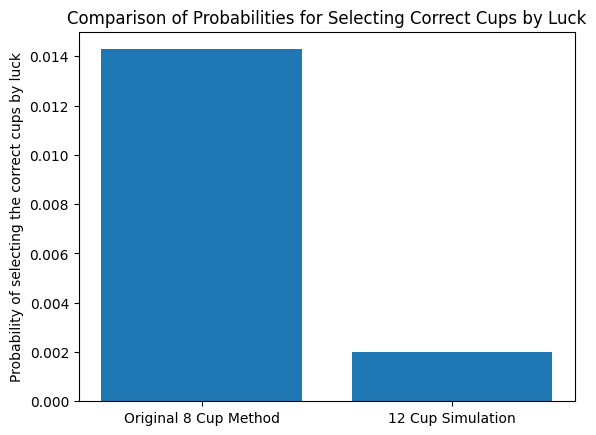

In [ ]:
# Visualizing the probabilities of selecting the correct cups by luck for both methods.
# Defining the x and y values for the bar chart.
x_values = ['Original 8 Cup Method', '12 Cup Simulation']
y_values = [1/70, 1/495]
# Creating the bar chart.
plt.bar(x_values, y_values)
# Adding labels and title to the chart.
plt.ylabel('Probability of selecting the correct cups by luck')
plt.title('Comparison of Probabilities for Selecting Correct Cups by Luck')
plt.show()

We can observe that increasing the cups from 8 to 12 greatly reduces the probability of being able to correctly guess the outcome. 
The difference is approximately $0.14-0.002 \approx 0.012$ or $\frac{0.012}{0.14} = 0.857$ $\approx$ 86%  reduction in probability.  
[plt.bar documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

Looking at all the probabilities of selecting each cup correctly by chance in both the 8 cup and 12 cup scenario.

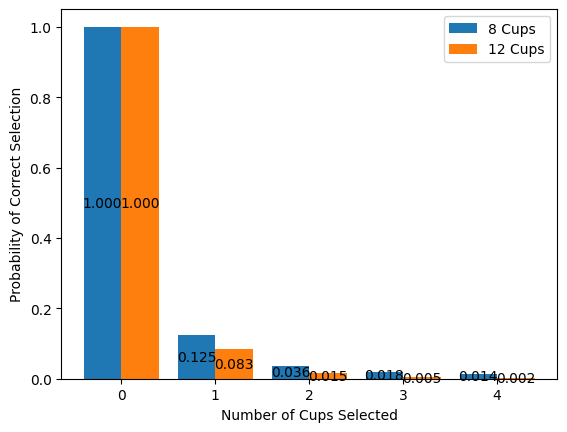

In [ ]:
# Comparing probabilities of selecting correct cups by luck for both methods using a bar chart.
# Defining the x and y values for the bar chart.
original_cups = 8
extended_cups = 12
cup_count = 0
y_original = []
y_extended = []
# Calculating probabilities for selecting 0 to 4 cups.
while cup_count <= 4:

    # Calculating the probability of selecting the correct cups by luck for both methods.
    ways_original = 1/math.comb(original_cups, cup_count)
    ways_extended = 1/math.comb(extended_cups, cup_count)
    # Appending the calculated probabilities to their respective lists.
    y_original.append(ways_original)
    y_extended.append(ways_extended)
    # Incrementing the cup count.
    cup_count += 1
# Defining the x values for the bar chart.
x = [0, 1, 2, 3, 4]
# Creating the bar chart.
fig, ax = plt.subplots()
# Plotting the bars for both methods with slight offsets for clarity.
bars1 = ax.bar([i - 0.2 for i in x], y_original, width=0.4, label='8 Cups')
bars2 = ax.bar([i + 0.2 for i in x], y_extended, width=0.4, label='12 Cups')
# Adding labels and title to the chart.
ax.set_xlabel('Number of Cups Selected')
ax.set_ylabel('Probability of Correct Selection')
ax.legend()
# Adding data labels to each bar for clarity.
ax.bar_label(bars1, label_type='center', fmt='%.3f')
ax.bar_label(bars2, label_type='center', fmt='%.3f')
plt.show()


We can ignore the number of cups selected as 0 as if we think about it there is only one way to select 0 from 8 or 12 cups and that is to select nothing at all and $ \frac{1}{1}$ = 1 or 100%.  
[matplotlib ax.bar documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html)

### To extend or relax the p-value threshold based on the results? 
In the original version of the experiment by Fisher the $p$ value also commonly denoted as $\alpha$ is the standard $p = 0.05$. This means that this is the statistical significance with which we can decide whether to reject the null hypothesis $H_0$.  
The null hypothesis in this case is that the lady cannot tell the difference in the tea and that it is by pure chance that she can guess the cups of tea correctly.  
As the original experiment is $\frac{1}{70}$ $\approx$ 1.4% which is <5% we can therefore reject $H_0$ in this instance.  
**Note**: It is important to understand that these findings do not prove or disprove the lady as such. They more show that it is highly unlikely that if she is to get the cups correct that statistically it is less likely than our $p$ of 5% and therefore we can reject the null hypothesis. It acts as evidence towards for or against our null hypothesis.  
More information on the experiment can be found in this excerpt from [The world of mathematics by James R. Newman](https://web.ma.utexas.edu/users/mcudina/m358k-lady-tasting-tea-original.pdf)
With this in mind given that our probability of guessing becomes even more unlikely in the 12 cup experiment:
|8 Cups                          | 12 Cups                         |
|:------------------------------:|:------------------------------: |
|$\frac{1}{70}$ $\approx$ 1.4%|$\frac{1}{495}$ $\approx$ 0.2%|   

Based on the reduced probability one could consider reducing the $p$ value threshold from 5% to 1%. This would demonstrate how the 12 cup scenario changes the probability of $H_0$ being rejected but the 8 cup scenario not being reject. However, one should ask what benefit there is from reducing the $p$ value threshold. Interesting debates have been held on this very subject for example in [this paper from Springer](https://eurradiolexp.springeropen.com/articles/10.1186/s41747-020-0145-y) in which lowering the $p$ value threshold could lead to the need for larger sample sizes increasing research costs however the alternative is that in fields with large amounts of data such as genomics, that a $p$ value of 5% leads to many false positives.  
In conclusion I can see the rationale in lowering the $p$ value threshold in order to highlight the increased unlikely nature of the probability from 8 cups to 12 however it is not entirely necessary.


## Problem 2: Normal Distribution
<p align="center">
  <img src="https://i.ytimg.com/vi/MqBR7RYFSas/maxresdefault.jpg" 
       alt="Normal Distribution Cartoon" width="800">
</p>

### Objective: 
_Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased._

Generating 100,000 samples of size 10 requires use of `np.random.normal()` documentation for which can be found [here at the numpy documentation](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html). 

`np.normal.random()` provides random samples from a Gaussian distribution. More on Gaussian distributions can be explained [here at this wikipedia page](https://en.wikipedia.org/wiki/Normal_distribution)

100,000 samples of size 10 are 100,000 rows of samples made of 10 columns in an array. Therefore we are generating  100000 x 10 = 1000000 values.
| Row \ Col | Col0 | Col1 | Col2 | ... | Col(N-1) |
|-----------|------|------|------|-----|-----------|
| Row0      | a00  | a01  | a02  | ... | a0(N-1)   |
| Row1      | a10  | a11  | a12  | ... | a1(N-1)   |
| Row2      | a20  | a21  | a22  | ... | a2(N-1)   |
| ...       | ...  | ...  | ...  | ... | ...       |
| Row(M-1)  | a(M-1)0 | a(M-1)1 | a(M-1)2 | ... | **a(M-1)(N-1)** |


In [ ]:
# Generate the normal distribution samples. First we must use best practices and utilise a generator for reproducibility.
rng = np.random.default_rng(seed=42)
# Generate the normal distribution  samples.
samples = rng.normal(size =(100000, 10))

Now that the samples are generated, we need to calculate the standard deviation of each sample with varying `ddof`. 

`numpy.std` which documentation of how to use can be found [here](https://numpy.org/devdocs/reference/generated/numpy.std.html). 
Assuming the `ddof` = 0 which is standard the calculation performed is:
    
$\text{std} = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \bar{x})^2}{N}}$


In [ ]:
# Calculate the standard deviation of each sample across the row of the matrix with ddof = 0.
ddof_0 =np.std(samples, axis=1, ddof=0)

We have therefore generated a number of standard deviations for each of the 10 values across the 100000 rows of our matrices using the default value for `ddof` of 0.

`ddof` is short for delta degrees of freedom.   
[This Youtube video](https://www.youtube.com/watch?v=nlm9gfso4mw) does a good job of explaining `ddof` conceptually.  
Essentially `ddof` = 0 represents is used if your sample is the entire population, whereas `ddof` = 1 is corrected using Bessel's correction to represent a sample of a population which is used in cases when measuring large samples where to measure an entire population is not feasible such as the heights of all the people in Ireland. More on Bessel's correction is [here](https://en.wikipedia.org/wiki/Bessel%27s_correction). 
The change in the value effects the formula that `numpy` uses to determine the standard deviation.  
$\text{std} = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \bar{x})^2}{N - \text{ddof}}}$


In [ ]:
# Calculate the standard deviation of each sample with ddof = .
ddof_1 =np.std(samples,axis = 1, ddof= 1)

We have both our samples standard deviations in an array of 100000 entries  
Next we need to plot them as histograms.  
To determine the number of bins, as we are using a large amount of data I will use  `bins = 'auto'` as recommended in this [geeksforgeeks](https://www.geeksforgeeks.org/python/bin-size-in-matplotlib-histogram/) article.  
As per the brief and the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) `alpha` will help with controlling the degree of transparency enabling us to see the two plots on top of each other. 

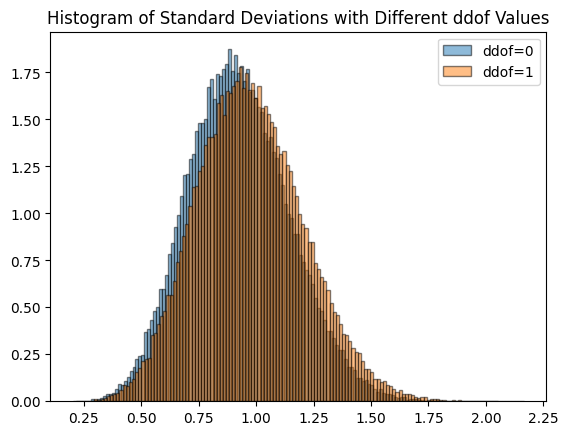

In [36]:
# Create an empty plot.
fig, ax = plt.subplots()
# Create histogram for ddof=0.
ax.hist(ddof_0,edgecolor = 'black', density=True, bins='auto', alpha=0.5, label='ddof=0')
ax.hist(ddof_1,edgecolor = 'black', density=True, bins='auto', alpha=0.5, label='ddof=1')
# Adding a title to the chart.
ax.set_title('Histogram of Standard Deviations with Different ddof Values')
ax.legend()


Looking at the histogram we can make the following observations:
* When `ddof = 1` histogram appears to be slightly more spread with higher values at the outlier ends than than that of `ddof=0`  
* When `ddof = 1` histogram the mean value appears to be slightly higher than that of `ddof=0`
* `ddof = 1` also appears to have more inconsistencies in the gradient of towards the outliers leading to a slightly less bell shape.  
  
Next we will see what would happen if the sample size were to increase. 
First if we revisit the standard deviation formula for `ddof = 0` and `ddof = 1`  

$\text{std} = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \bar{x})^2}{N}}$ $\text{std} = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \bar{x})^2}{N - \text{ddof}}}$

We can see that the standard deviation which we greatly effects the spread of the curve, examples and explanations to which can be reviewed here on [jmp](https://www.jmp.com/en/statistics-knowledge-portal/measures-of-central-tendency-and-variability/normal-distribution), is dependant on the sample size. As sample size increases the standard deviation should decrease.

The only difference in the formulae is that the denominator either includes $N$ or $N-ddof$. Therefore as the sample size increases the standard deviation should decrease therefore reducing the standard deviation and narrowing the width of the histogram.

As $n \to \infty$ the effect of the `ddof` becomes more and more negligible. An example exploring the change in variance which is the squared value of the standard deviation with sample size increases on [Medium](https://medium.com/@dtuk81/sample-sizes-impact-on-effect-size-and-power-fbd5084c7c47). The larger the sample size the smaller the effect of `ddof` on standard deviation values and on the mean of those values. 

The difference between dividing a number by 9 vs 10 is much more significant than dividing 99 vs 100.

Therefore we would expect the two graphs to become narrower and more overlapped with each other as sample size increases until they are almost overlapped. 
Let's test our theory.




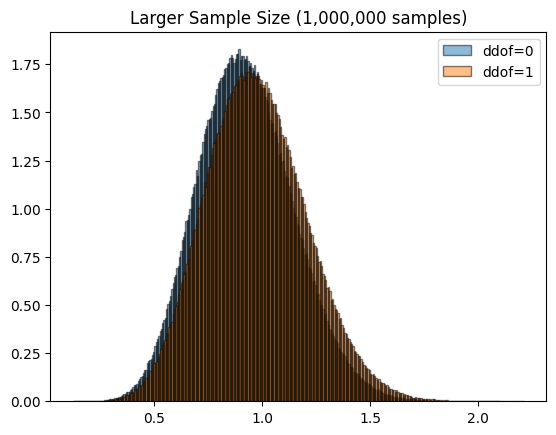

In [ ]:
# Next increase the sample size to see how it affects the standard deviation calculations.
# Generate the normal distribution samples with larger size.
rng_1 = np.random.default_rng(seed=42)
samples_1 = rng_1.normal(size =(1000000, 10))
ddof_0_bigger =np.std(samples_1, axis=1, ddof=0)
ddof_1_bigger =np.std(samples_1,axis = 1, ddof= 1)
# Create an empty plot.
fig, ax = plt.subplots()
# Create histogram for ddof=0 and ddof=1.
ax.hist(ddof_0_bigger,edgecolor = 'black', density=True, bins='auto', alpha=0.5, label='ddof=0')
ax.hist(ddof_1_bigger,edgecolor = 'black', density=True, bins='auto', alpha=0.5, label='ddof=1')
ax.set_title('Larger Sample Size (1,000,000 samples)')
ax.legend()



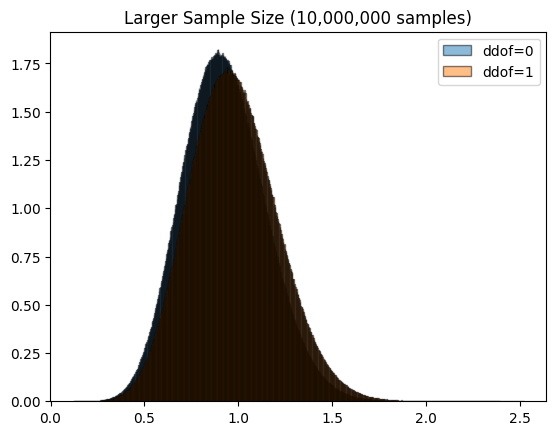

In [ ]:
# Next increase the sample size further to see how it affects the standard deviation calculations.
# Generate the normal distribution samples with even larger size.
rng_1 = np.random.default_rng(seed=42)
samples_1 = rng_1.normal(size =(10000000, 10))
ddof_0_bigger =np.std(samples_1, axis=1, ddof=0)
ddof_1_bigger =np.std(samples_1,axis = 1, ddof= 1)
# Create an empty plot
fig, ax = plt.subplots()
# Create histogram for ddof=0 and ddof=1.
ax.hist(ddof_0_bigger,edgecolor = 'black', density=True, bins='auto', alpha=0.5, label='ddof=0')
ax.hist(ddof_1_bigger,edgecolor = 'black', density=True, bins='auto', alpha=0.5, label='ddof=1')
ax.set_title('Larger Sample Size (10,000,000 samples)')
ax.legend()

We can therefore see that our theoretical suspicion has been proven with the above graphs. With the means coming very close to overlapping and the standard deviation becoming more narrow.


## Problem 3: t-Tests
<p align="center">
  <img src="https://www.investopedia.com/thmb/pUIy_k7H35ssuuD3AHsd1Uei6I4=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/t-test_final2-d26bbb129cc441c192ccf8e784ae06a4.png" 
       alt="Investopedia Ttest cartoon" width="800">
</p>

### Objective: 
_A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times_

_1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1._

_2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05._ 

_3. Record the proportion of times the null hypothesis is not rejected._

_Plot this proportion against $d$, and explain how the type II error rate changes as the difference in means increases._

More information on type II errors and how they differ from type I errors can be found on this [Wikipedia page](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)

Let's set up our samples and define our variables.

In [ ]:
# Set up random number generator
rng = np.random.default_rng(seed=56)
# Create out mean differences as an array.
d = np.linspace(0.0, 1.0, num=11)
# Set simulation number.
simulations = 1000
# Generate out standard normal samples and our normal samples.
sample_1 = rng.standard_normal(100)
for i in d:
    sample_2 = rng.normal(loc = i, scale = 1, size = 100)


Next I will generate the t-test for one iteration
This is an independent samples t-test the [scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) explains in detail.  
It is a test that two independent samples have the same mean. Therefore if we obtain a $p$-value < 0.05. We can reject $H_0$ and therefore the difference between the two samples is statistically significant. 
 

In [ ]:
# Perform t-test between sample_1 and sample_2.
stats.ttest_ind(sample_1, sample_2)

TtestResult(statistic=np.float64(-7.775901551984969), pvalue=np.float64(4.0161116170785153e-13), df=np.float64(198.0))

For example here a $p$-value $\approx$ 0.65 which is >0.05 therefore in this instance we would fail to reject $H_0$
Next to do this for all the planned iterations. 

In [ ]:
# Initialise results list.
results = []
# Set significance level.
alpha = 0.05
for i in range(simulations):
# Loop through each mean difference.
    for i in d :
        # Calculate standard normal sample and normal sample with mean difference i.
        sample_1 = rng.standard_normal(100)
        sample_2 = rng.normal(loc = i, scale = 1, size = 100)
        # Perform indepdendent t-test.
        t_stat, p_value = stats.ttest_ind(sample_1, sample_2)
        # If p_value is less than alpha, we reject the null hypothesis and append 1 to results, else append 0.
        if p_value < alpha:
            results.append(1)
        else:
            results.append(0)

     

In [ ]:
# Convert results to a numpy array for easier analysis.
np.asarray(results)

array([0, 0, 0, ..., 1, 1, 1], shape=(11000,))

At present all my results exist in one numpy array. The 11th result of each corresponds to a different mean difference. Therefore we must take out numpy array and create 11 numpy arrays one for each mean difference.

In [ ]:
# Take the first element in the array (index 0) and then every 11th element after that.
results_d0 = results[0::11]
# Repeat for all other mean differences.
results_d1 = results[1::11]
results_d2 = results[2::11]
results_d3 = results[3::11]
results_d4 = results[4::11]
results_d5 = results[5::11]
results_d6 = results[6::11]
results_d7 = results[7::11]
results_d8 = results[8::11]
results_d9 = results[9::11]
results_d10 = results[10::11]



In order to determine the proportion of not rejected $H_0$ we need to take the sum of the array (the rejected $H_0$) and divide it by the length of the array.  
$(LenArray - Sum) \div LenArray$  
[Documentation on indexing `numpy` arrays](https://numpy.org/doc/stable/user/basics.indexing.html)

In [ ]:
# Calculate the proportion of rejections for each mean difference.
results_d0_prop = np.sum(results_d0)/ len(results_d0)
results_d1_prop = np.sum(results_d1)/ len(results_d1)
results_d2_prop = np.sum(results_d2)/ len(results_d2)
results_d3_prop = np.sum(results_d3)/ len(results_d3)
results_d4_prop = np.sum(results_d4)/ len(results_d4)
results_d5_prop = np.sum(results_d5)/ len(results_d5)
results_d6_prop = np.sum(results_d6)/ len(results_d6)
results_d7_prop = np.sum(results_d7)/ len(results_d7)
results_d8_prop = np.sum(results_d8)/ len(results_d8)
results_d9_prop = np.sum(results_d9)/ len(results_d9)
results_d10_prop =np.sum(results_d10)/ len(results_d10)   
results_d0_prop, results_d1_prop, results_d2_prop, results_d3_prop, results_d4_prop, results_d5_prop, results_d6_prop, results_d7_prop, results_d8_prop, results_d9_prop, results_d10_prop

(np.float64(0.068),
 np.float64(0.103),
 np.float64(0.286),
 np.float64(0.573),
 np.float64(0.801),
 np.float64(0.941),
 np.float64(0.984),
 np.float64(0.997),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0))

Now that we have the proportion of fail to reject $H_0$ for each mean difference let's visualise it using a plot.

<function matplotlib.pyplot.show(close=None, block=None)>

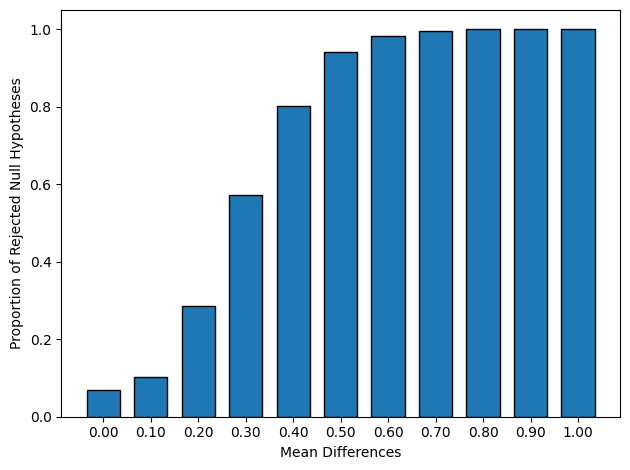

In [ ]:
# Plot the results as a bar chart.
# Set up the y results.
y = [results_d0_prop, results_d1_prop, results_d2_prop, results_d3_prop, results_d4_prop, results_d5_prop, results_d6_prop, results_d7_prop, results_d8_prop, results_d9_prop, results_d10_prop]
# Create the bar chart.
plt.bar(d, y, width=0.07, edgecolor='black', linewidth=1)
# Labels and layout.
plt.ylabel('Proportion of fail to reject Null Hypotheses')
plt.xlabel('Mean Differences')
plt.xticks(d, labels=[f"{val:.2f}" for val in d])
plt.tight_layout()
plt.show

When mean difference = 0 in the first bar we know that both samples do have the same mean as we have forced this. Therefore we would expect with an $\alpha = 0.05$ to reject the null hypothesis approximately 5% of the time or 1 in 20 chance.   
As the mean difference increases the t-test should reject $H_0$ with more certainty as the means are becoming more and more different.
We can observe this in the above bar chart where a mean difference of >0.7 appears to be almost 1 for the proporiton of rejected $H_0$  
Extra reading of this [Investopedia article](https://www.investopedia.com/terms/t/t-test.asp) was very useful.

## Problem 4: ANOVA
<p align="center">
  <img src="https://www.investopedia.com/thmb/DtBF1qar0c5euf4cbG5VqHQ4dZg=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Analysis-of-Variance-046c809d7efa49d98ea53c4b232a86e8.jpg" 
       alt="ANOVA Cartoon" width="800">
</p>

### Objective: 
_Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1._

_1. Perform a one-way ANOVA to test whether all three means are equal._  
_2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3._  
_3. Compare the conclusions._  

_Write a short note on why ANOVA is preferred over running several t-tests._

In [ ]:
# Generate three independent samples from normal distributions with means 0, 0.5, and 1.0 respectively and standard deviation 1.0.
rng = np.random.default_rng(seed=100)
sample_1 = rng.normal(loc=0.0, scale=1.0, size = 30)
sample_2 = rng.normal(loc=0.5, scale=1.0, size = 30)
sample_3 = rng.normal(loc=1.0, scale=1.0, size = 30)

In [33]:
# Perform one-way ANOVA test on the samples to see if there are significant differences between the means of the three groups.
_, p_value = stats.f_oneway(sample_1, sample_2, sample_3)
p_value

np.float64(0.010689592264288792)

As we can see in the above our p_value is <0.05 therefore we would reject the null hypothesis suggesting that the means of at least two of these groups are not the same.  
As we have generated the data we of course know that the means of all 3 samples are not the same. 
Next let's look at performing t-tests of each sample against each other to see which groups likely have identical means and which do not.   
[Scipy documentation on `stats.f_oneway`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)  
[A useful Investopedia article on introduction to ANOVA](https://www.investopedia.com/terms/a/anova.asp)

In [ ]:
# Perform t-tests between each pair of samples to see which specific groups differ we are only concerned with the p-values here.
_, p_value_1v2 = stats.ttest_ind(sample_1, sample_2)
_, p_value_1v3 = stats.ttest_ind(sample_1, sample_3)
_, p_value_2v3 = stats.ttest_ind(sample_2, sample_3)
p_value_1v2, p_value_1v3, p_value_2v3

(np.float64(0.06493638464314717),
 np.float64(0.0033504300457931823),
 np.float64(0.2464591771880251))

The above results suggest that:
* Sample 1v2 - This p_value $\approx$ 0.06 value is very close to 0.05 suggesting weak evidence against rejecting $H0$ as we fail to reject $H0$ at a 5% or higher significance level.
* Sample 1v3 - This p_value is < 0.05 significantly and therefore we can reject $H0$ and have evidence there is a statistically significant difference between sample 1v3 
* Sample 2v3 - This p_value is > 0.05 significantly and therefore we can fail to reject $H0$ meaning that there is insufficient evidence to conclude the two samples are different.  

However as we generated the data we know that the means of all 3 samples are in fact different but it appears the t-tests have only been able to determine this in 2 sample comparisons and only strongly in one of them.  

Why is this?  

Let's investigate.

Comparing ANOVA and the independent t-tests we can see that they both reinforce what the other is saying.  
ANOVA told us with a p_value of $\approx$ 0.01 we reject $H0$ and that at least one of the samples is not identical to the other.  

Following up these findings with t-tests we were able to determine based on p_values which of the samples have no significant difference and which do.  

According to the t-test results:  
* Sample 1v2 = fail to reject (weakly) - type II error 
* Sample 1v3 = reject 
* Sample 2v3 = fail to reject (strong) - type II error  

As we know that $H0$ is false and 2 of our t-tests failed to reject in this instance we have 2 type II errors, explanation of these errors are available here on [Scribbr](https://www.scribbr.com/statistics/statistical-power/?utm_source=chatgpt.com)

As observed in this article introducing hypothesis testing [by statistics by Jim](https://statisticsbyjim.com/hypothesis-testing/failing-reject-null-hypothesis/?utm_source=chatgpt.com) the reason for the p_values failing to reject all 3 t-tests could be due to:
* Chance 
* A small amount of data 
* Poor data quality 

We can assume that as we generated the data its no the quality of the data and as we can rerun the tests and obtain the same results we can investigate the amount of data that we have generated as the main cause.





Researching ANOVA vs using multiple t-tests we can see as observed here in [Laerd Statistics](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php) we know that the reason why ANOVA is preferred over multiple t-tests is that in a t-test there is a usually a 5% significance level. This level tells us that in an instance where the null hypothesis is true there is a 5% chance that randomly we will reject a null hypothesis that in fact is true causing a type I error the more t-tests we run the more 5% chances accumulate.  
It is important to not that it is not the sum of the percentages in the case of 3 t-tests it is 14.3%. This can be found from the Family-Wise error rate (FWER) :
An introduction to the above can be reviewed on this helpful [Wikipedia page](https://en.wikipedia.org/wiki/Family-wise_error_rate)

$\mathrm{FWER} = 1 - (1 - \alpha)^m$

where $\alpha$ = significance level  

$m$ = number of t-tests

So for 3 t-tests:

$\mathrm{FWER} = 1 - (1 - 0.05)^3$  

$\mathrm{FWER} = 1 - (0.95)^3$  

$\mathrm{FWER} = 1 - 0.8573753$  


$\mathrm{FWER} = 0.142625$  

$\mathrm{FWER} \approx 14.3$%  


However in our example we know that as we generated the data these 3 samples are in fact statistically distinct. We saw two instances of Type II error in the t-test. The above is a calculation under the assumption that $H0$ is not rejected. Whereas in our example $H0$ is rejected based on our data, hence we cannot get Type I errors.

Whereas in ANOVA there is controls these errors using F-testing with the error being across all the comparisons as opposed to each individual comparison. This is outlined here on [Scribbr](https://www.scribbr.com/statistics/one-way-anova/). A single F statistic is tested against a F distribution.

$
F = \frac{\mathrm{MS}_{\text{between}}}{\mathrm{MS}_{\text{within}}} $  

$ \quad P(F \ge F_{\alpha; k-1, N-k} \mid H_0) = 0.05
$

$F$: ANOVA F-statistic used to test the null hypothesis.

$\mathrm{MS}_{\text{between}}$: Mean square between groups, measuring variability of group means around the overall mean.

$\mathrm{MS}_{\text{within}}$: Mean square within groups, measuring variability of observations within each group.

$\mathrm{SS}_{\text{between}}$: Sum of squares between groups.

$\mathrm{SS}_{\text{within}}$: Sum of squares within groups.

$k$: Number of groups.

$N$: Total number of observations across all groups.

$k - 1$: Degrees of freedom for between-groups variation.

$N - k$: Degrees of freedom for within-groups variation.

$\alpha$: Significance level (probability of a Type I error), typically $\alpha = 0.05$.

$F_{\alpha; k-1, N-k}$: Critical value from the F-distribution with $(k-1, N-k)$ degrees of freedom at significance level $\alpha$.  

The above mathematics can be found in this [LibreTexts Statistics](https://stats.libretexts.org/Bookshelves/Advanced_Statistics/Intermediate_Statistics_with_R_%28Greenwood%29/03%3A_One-Way_ANOVA/3.03%3A_One-Way_ANOVA_Sums_of_Squares_Mean_Squares_and_F-test?utm_source=chatgpt.com) chapter and help us to understand why ANOVA is better than multiple t-tests.



### References:
- A very helpful github guide on `markdown` used throughout for all markdown formatting [here](https://github.com/adam-p/markdown-here/wiki/markdown-cheatsheet)
- A helpful guide to using [Latex in markdown](https://ashki23.github.io/markdown-latex.html#latex)

## END